# COMP30850 Network Analysis - Assignment 1 - Student ID: 19206730

**The objective of this assignment is to model co-starring relations between actors in two datasets. This report is divided into 5 sections:**

**1. Network Construction**

**2. Network Characterisation**

**3. Network Thresholding**

**4. Ego-centric Analysis**

**5. Network Visualisation**

In [1]:
import json
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## <u>Task 1 - Network Construction:</u>

**JSON data is downloaded using a unique link which has information regarding actors' ID, name, date of birth, and a list of movies. This data is then loaded into two different objects json_data1 and json_data2. The size of both datasets are found.**

In [2]:
path1 = "/Users/idilbilgic/Desktop/STAGE3.2/COMP30850/assignments/assignment1/19206730/19206730-dataset1.json"
path2 = "/Users/idilbilgic/Desktop/STAGE3.2/COMP30850/assignments/assignment1/19206730/19206730-dataset2.json"

with open(path1, "r") as fr1: 
        json_data1 = json.load(fr1)

with open(path2, "r") as fr2: 
        json_data2 = json.load(fr2)

size1 = len(json_data1)
size2 = len(json_data2)
print("Dataset 1 size: ", size1)
print("Dataset 2 size: ", size2)

Dataset 1 size:  188
Dataset 2 size:  212


In [3]:
def common_movies(name1, name2):
        movies1 = set(movie["id"] for movie in name1["movies"])
        movies2 = set(movie["id"] for movie in name2["movies"])
        return len(movies1.intersection(movies2))

**With utilising the function above which returns the number of common movies that two actors have together, the function below creates a weighted and undirected network using the intersection of movies that actors worked in together where nodes represent individual actors and edges between these nodes represent their relationship as co-stars. The network contains only reciprocal relationships where actors co-star with at least one other actor and the weight represents the number of common movies they have together. I found this way of creating a network useful as it made analysis easier in the tasks below.**

In [4]:
def network_creation(dataset):
    g = nx.Graph()
    
    for name1, name2 in combinations(dataset, r=2):
        movies_intersect = common_movies(name1, name2)
        if movies_intersect != 0: #if not an isolated node
            g.add_edge(name1["name"], name2["name"], weight=movies_intersect)
    
    return g

In [5]:
network1 = network_creation(json_data1)
network2 = network_creation(json_data2)

In [6]:
def network_size(network, size):
    print("Network has %d nodes and %d edges." % (network.number_of_nodes(), network.number_of_edges()))
    print("%d/%d actors have been added from the dataset, %d nodes are remaining." % (network.number_of_nodes(), size, size-network.number_of_nodes()))
    
print("Network 1:")
network_size(network1, size1)
print()
print("Network 2:")
network_size(network2, size2)

Network 1:
Network has 157 nodes and 364 edges.
157/188 actors have been added from the dataset, 31 nodes are remaining.

Network 2:
Network has 182 nodes and 478 edges.
182/212 actors have been added from the dataset, 30 nodes are remaining.


**From above, it can be seen that 157/188 actors have been added from the first dataset and 182/212 from the second dataset. This shows that the remaining nodes were isolated and thus, were not added to their respected networks.**

**The function below investigates the top 10 pairs of actors that have common movies together and visualises in a dataframe for both datasets. Ordering edges by weight in a dataframe resulted in top actor pairs who co-starred in movies together.**

In [7]:
def top_costars(network):
    df = nx.to_pandas_edgelist(network)
    df.columns = ["Actor1", "Actor2", "Movies Count"]
    return df.sort_values(by="Movies Count", ascending=False).head(7)

In [8]:
top_costars(network1)

,Actor1,Actor2,Movies Count
288,Chris Evans,Elizabeth Olsen,4
18,Jesse Eisenberg,Amy Adams,4
96,Mark Williams,Bonnie Wright,3
212,Daisy Ridley,John Boyega,3
159,Matthew McConaughey,Reese Witherspoon,3
98,Julie Walters,Colin Firth,3
275,Tom Vaughan-Lawlor,Elizabeth Olsen,2


In [9]:
top_costars(network2)

,Actor1,Actor2,Movies Count
212,Oliver Phelps,James Phelps,7
211,Oliver Phelps,Devon Murray,5
64,Mark Hamill,Peter Mayhew,4
148,Kurt Russell,Jason Statham,3
216,Devon Murray,James Phelps,3
460,Aidan Turner,James Nesbitt,3
108,Kelly Marie Tran,Anthony Daniels,3


**In network1, "Chris Evans" - "Elizabeth Olsen" and "Jesse Eisenberg" - "Amy Adams" are the pairs with the most costarring relationships with 4 movies together. In network2, the highest costarring relationship with 7 movies together is the pair of "Oliver and James Phelps".**

## <u>Task 2 - Network Characterisation:</u>

**Both networks' character is investigated under following titles:**
- **Edge Weight Distribution**
- **Network Density**
- **Network Connnectedness**
- **Network Diameter and Shortest Path**
- **Clustering Coefficient**
- **Node Degree Distribution**
- **Centrality (Degree, Betweenness, Closeness, Eigenvector)**

### <u>Edge Weight Distribution:</u>

In [10]:
network1_weights = [edge[-1]["weight"] for edge in network1.edges(data=True)]
network2_weights = [edge[-1]["weight"] for edge in network2.edges(data=True)]

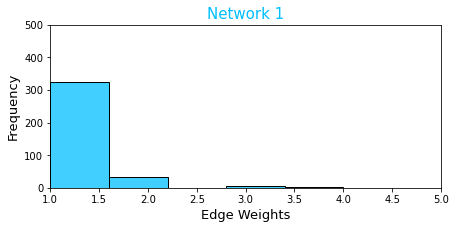

In [11]:
fig, ax1 = plt.subplots(figsize =(7,3))
sns.histplot(data=network1_weights, bins=5, color="deepskyblue", ax=ax1)
ax1.set_xlabel("Edge Weights", fontsize=13)
ax1.set_ylabel("Frequency", fontsize=13)
plt.xlim(1, 5)
plt.ylim(0, 500)
plt.title(label="Network 1", fontsize=15, color="deepskyblue")
plt.show()

**From the histogram above, it can be seen that the majority of actor pairs in the first network co-star in 1 movie (with a frequency of 300+). There is still a fair amount of pairs that co-star in 2 movies, however, way less than 100. There are very few instances of actor pairs co-starring in 2+ movies in this network.**

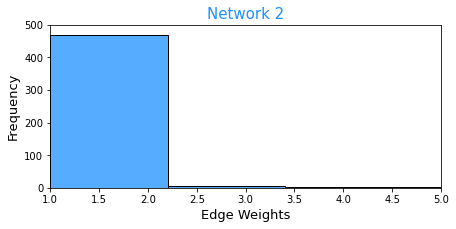

In [12]:
fig, ax2 = plt.subplots(figsize =(7,3))
sns.histplot(data=network2_weights, bins=5, color="dodgerblue", ax=ax2)
ax2.set_xlabel("Edge Weights", fontsize=13)
ax2.set_ylabel("Frequency", fontsize=13)
plt.xlim(1, 5)
plt.ylim(0, 500)
plt.title(label="Network 2", fontsize=15, color="dodgerblue")
plt.show()

**From the histogram above, it can be seen that majority of actor pairs in the second network co-star mostly in 1  or 2 movies (with a frequency of 400+). Some pairs co-star in 2-3 movies, however, this is significantly less.**

### <u>Network Density:</u>

**Density: potential edges between nodes in a network that exist as actual edges. A network with high density is said to be dense, while a network with low density is said to be sparse.**

In [13]:
density1 = nx.density(network1)
density2 = nx.density(network2)

print("Network 1 density: ", density1)
print("Network 2 density: ", density2)

if max(density1, density2) == density1:
    print("Network 1 has higher density with ", density1)
else:
    print("Network 2 has higher density with ", density2)

Network 1 density:  0.029723991507430998
Network 2 density:  0.029020703053852227
Network 1 has higher density with  0.029723991507430998


**Densities of both networks are similar with ~0.0297 for network1 and ~0.0290 for network2. Density of network1 is greater from the density of network2. It can be concluded that network1 is more dense and network2 is more sparse.**

### <u>Network Connectedness:</u>

In [14]:
def connectedness(network):
    connected = nx.is_connected(network)
    components = nx.number_connected_components(network)
    return "Connectedness: " + str(connected) + ", with " + str(components) + " components."

In [15]:
print("Network 1 --> ", connectedness(network1))
print("Network 2 --> ", connectedness(network2))

Network 1 -->  Connectedness: False, with 7 components.
Network 2 -->  Connectedness: False, with 2 components.


**Due to the nature of the networks, the foundings above can be verified from plotting the networks' graphs where it can be observed that network1 consists of 7 unconnected node groups and network2 consists of 2.**

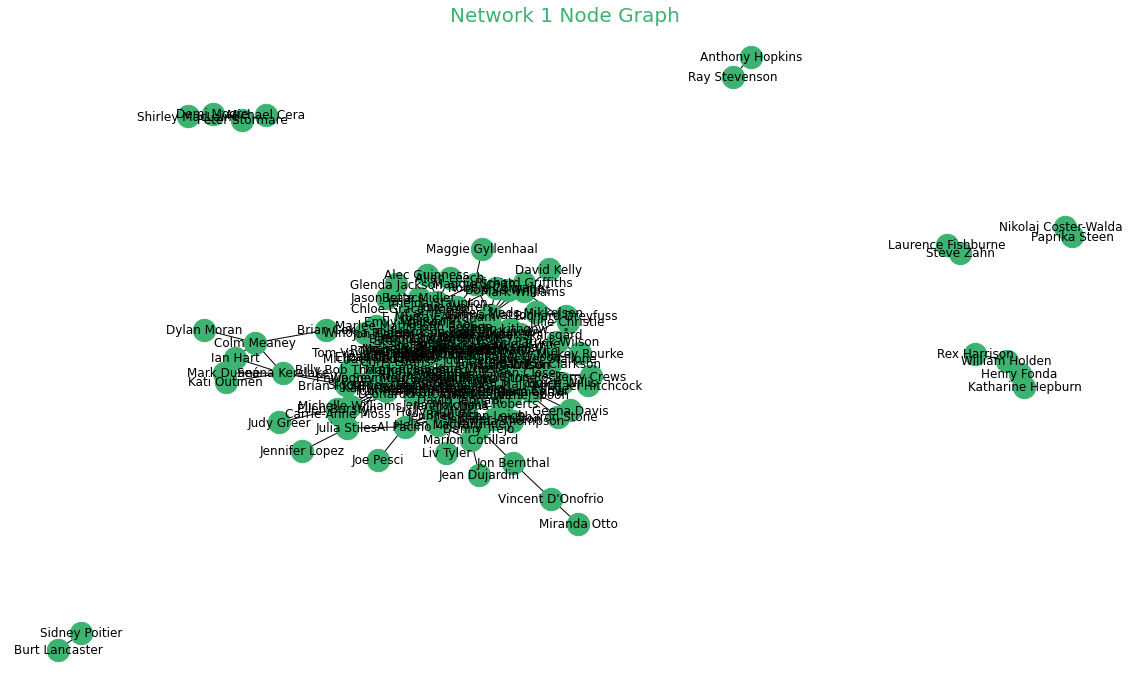

In [16]:
plt.figure(figsize=(20,12))
nx.draw_networkx(network1, with_labels=True, node_size=500, node_color="mediumseagreen")
plt.title(label="Network 1 Node Graph", fontsize=20, color="mediumseagreen")
plt.axis("off")
plt.show()

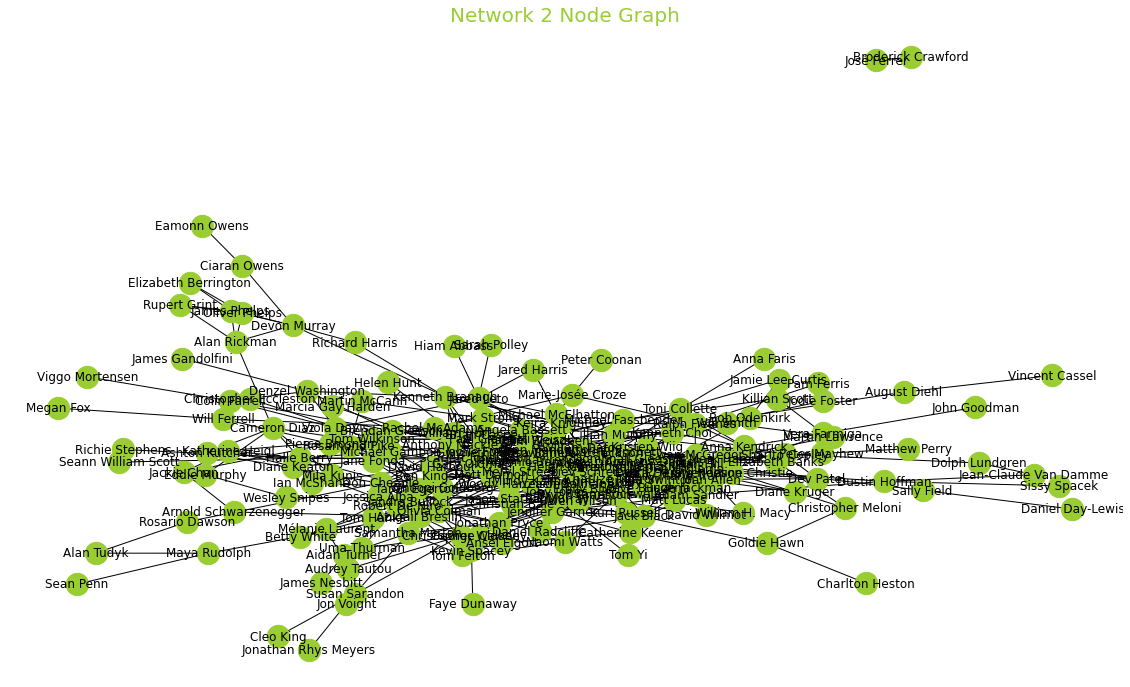

In [17]:
plt.figure(figsize=(20,12))
nx.draw_networkx(network2, with_labels=True, node_size=500, node_color="yellowgreen")
plt.title(label="Network 2 Node Graph", fontsize=20, color="yellowgreen")
plt.axis("off")
plt.show()

### <u>Network Diameter and Shortest Path:</u>

**Diameter: the maximum distance between all pairs of a network's nodes. This represents how quickly information can be transmitted across the entire network. As the diameter gets higher, the network tends to be less linked.**

**Shortest Path: the shortest possible route from one node to the other in the network where path is a sequence of nodes, each connected by an edge with no repeating nodes.**

In [18]:
def path(network):
    d = list(nx.connected_components(network))[0]
    diameter = nx.diameter(nx.subgraph(network, d))
    av_shortest = nx.average_shortest_path_length(nx.subgraph(network, d))
    return "Diameter: " + str(diameter) + ", Average Shortest Path: " + str(av_shortest)

In [19]:
print("Network 1 --> ", path(network1))
print("Network 2 --> ", path(network2))

Network 1 -->  Diameter: 9, Average Shortest Path: 3.5526849037487334
Network 2 -->  Diameter: 9, Average Shortest Path: 3.710800744878957


**Since both networks are not connected, this function is operating with the (larger) component of each network's nodes and shortest path is evaluated by the average of paths in the networks.**

### <u>Clustering Coefficient:</u>

**Clustering Coefficient: the fraction of pairs of a node's neighbours that have edges between one another.**

In [20]:
pd.set_option("display.precision", 4)

In [21]:
def clustering(network):
    c_df = pd.DataFrame.from_dict(nx.clustering(network), orient="index", columns=["Clustering Coefficient"])
    return c_df.sort_values(by="Clustering Coefficient", ascending=False).head(20)

In [22]:
clustering(network1)

,Clustering Coefficient
Richard Griffiths,1.0000
Ian Hart,1.0000
Michael Douglas,1.0000
Jason Isaacs,1.0000
Allen Leech,1.0000
Bette Midler,1.0000
Reese Witherspoon,1.0000
Jennifer Aniston,1.0000
Laura Linney,1.0000
Tom Vaughan-Lawlor,0.8000


In [23]:
clustering(network2)

,Clustering Coefficient
Uma Thurman,1.0000
Jared Harris,1.0000
Elizabeth Berrington,1.0000
Rupert Grint,1.0000
Brian Caspe,1.0000
Richard Harris,1.0000
Jack Black,0.7143
Kelly Marie Tran,0.6909
Billy Dee Williams,0.6444
Liam Neeson,0.6182


In [24]:
print("Average Clustering Coefficients:")
av_clustering1 = nx.average_clustering(network1)
av_clustering2 = nx.average_clustering(network2)
print("Network 1 - " + str(av_clustering1))
print("Network 2 - " + str(av_clustering2))
print()

if max(av_clustering1, av_clustering2) == av_clustering1:
    print("Network 1 has higher average clustering with ", av_clustering1)
else:
    print("Network 2 has higher average clustering with ", av_clustering2)

Average Clustering Coefficients:
Network 1 - 0.215637865319394
Network 2 - 0.19909078893488436

Network 1 has higher average clustering with  0.215637865319394


**Locally, clustering coefficient indicates the level of concentration of edges in the neighbourhood of a node. Globally, clustering coefficient indicates level of clustering in across an entire network.**

### <u>Node Degree Distribution:</u>

**Degree: the number of edges ending at a node – i.e. the number of connections the node has in a network. Larger degree indicates that there is a large number of sources available to the node which makes it easier to gather information.**

In [25]:
def stats(network, number):
    degree = pd.Series(dict(nx.degree(network)))
    print("Range [minimum, maximum]: [%d,%d]" % (degree.min(), degree.max()))
    print("Mean (Average): ", degree.mean())
    print("Median: ", degree.median())
    return degree

In [26]:
print("Network 1 Degree Statistics:")
degree1 = stats(network1, 1)

Network 1 Degree Statistics:
Range [minimum, maximum]: [1,14]
Mean (Average):  4.6369426751592355
Median:  4.0


In [27]:
print("Network 2 Degree Statistics:")
degree2 = stats(network2, 1)

Network 2 Degree Statistics:
Range [minimum, maximum]: [1,19]
Mean (Average):  5.252747252747253
Median:  4.0


**Networks' degree medians are found to be the same. When their average degrees are compared, it was found that network2 had a slightly higher degree average. The reflection of this could also be seen in the minimum and maximum limits of degree range where network2's maximum degree is 19 while network1's is 14.**

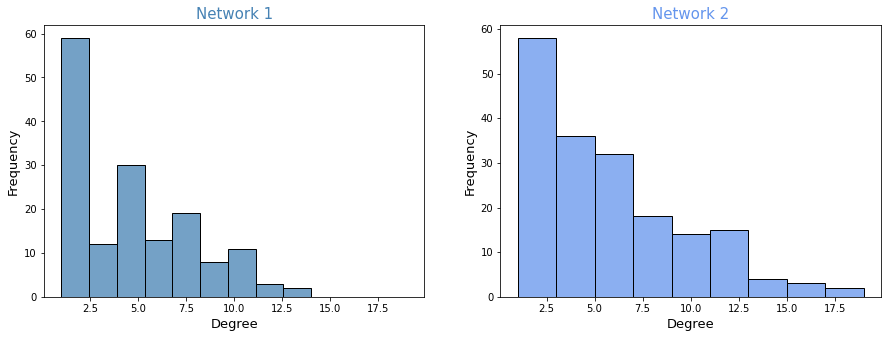

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharex=True)

sns.histplot(data=degree1, color="steelblue", ax=ax1)
ax1.set_xlabel("Degree", fontsize=13)
ax1.set_ylabel("Frequency", fontsize=13)
ax1.set_title(label="Network 1", fontsize=15, color="steelblue")

sns.histplot(data=degree2, color="cornflowerblue", ax=ax2)
ax2.set_xlabel("Degree", fontsize=13)
ax2.set_ylabel("Frequency", fontsize=13)
ax2.set_title(label="Network 2", fontsize=15, color="cornflowerblue")

plt.show()

**From the histograms it can be seen that network1 has varying frequencies of degrees. On the other hand, network2 has a gradually decreasing frequency as the degree gets larger.**

### <u>Centrality:</u>

**Centrality is used to identify the most important nodes in a network model. In this section, listed centrality measures are investigated:**
- **Degree C. --> measured by the degree of each n node divided by n-1** 
- **Betweenness C. -->  used to find "bridging" nodes in a network which are nodes that occur on shortest paths between other nodes** 
- **Weighted Betweenness C. --> same as above using weights that are associated with edges** 
- **Closeness C. --> measures the extend to which a node is close to all other nodes in a network (directly or indirectly)** 
- **Eigenvector C. --> eigenvector of a node is proportional to the sum of the centrality scores of its neighbours, meaning that a node is important if it is connected to other important nodes** 
- **Norm Eigenvector C. --> Often the normalised eigenvector centrality is reported to allow for comparisons across different networks. Normalisation is done relative to the maximum value in the current network.**

In [29]:
def centrality(network, sorting_column):
    degree = nx.degree_centrality(network)
    series = pd.Series(degree)
    c_df = pd.DataFrame(series, columns=["Degree"])
    
    betweenness = nx.betweenness_centrality(network)
    c_df["Betweenness"] = pd.Series(betweenness)
    
    w_betweenness = nx.betweenness_centrality(network, weight="weight")
    c_df["Weighted B."] = pd.Series(w_betweenness)
    
    closeness = nx.closeness_centrality(network)
    c_df["Closeness"] = pd.Series(closeness)
    
    eigenvector = nx.eigenvector_centrality(network)
    c_df["Eigenvector"] = pd.Series(eigenvector)
    
    c_df["Norm E."] = c_df["Eigenvector"]/max(c_df["Eigenvector"])
    
    return c_df.sort_values(by=sorting_column, ascending=False).head(10)

**The degree of a node is an appropriate measure to use when the number of connections in the network is important. The eigenvector measure also points the important nodes according to their connections to other important nodes. From analysing the two dataframes below, it can be observed "Adam Driver" and "Samuel Jackson" are number 1 and number 3 respectively in both dataframes. This meand that there is a strong correlation between degree and eigenvector scores of nodes. However, as we can also observe number 2 changing, there is different aspects to take into consideration when evaluating the importance of nodes.**

In [30]:
network2_df = centrality(network2, "Degree")
network2_df

,Degree,Betweenness,Weighted B.,Closeness,Eigenvector,Norm E.
Adam Driver,0.1050,0.0866,0.0823,0.3657,0.3160,1.0000
Scarlett Johansson,0.0939,0.1369,0.1302,0.3899,0.1583,0.5008
Samuel L. Jackson,0.0829,0.0313,0.0476,0.3431,0.2590,0.8197
Bill Murray,0.0829,0.0638,0.0660,0.3613,0.1495,0.4730
Marisa Tomei,0.0829,0.0505,0.0553,0.3642,0.1415,0.4479
Domhnall Gleeson,0.0773,0.0266,0.0225,0.3321,0.2606,0.8247
Cate Blanchett,0.0718,0.0503,0.0570,0.3519,0.1191,0.3769
Tilda Swinton,0.0718,0.0198,0.0205,0.3321,0.1731,0.5478
Charlize Theron,0.0718,0.0584,0.0489,0.3385,0.0617,0.1953
Anthony Daniels,0.0663,0.0059,0.0026,0.3172,0.2552,0.8077


In [31]:
centrality(network2, "Eigenvector")

,Degree,Betweenness,Weighted B.,Closeness,Eigenvector,Norm E.
Adam Driver,0.1050,0.0866,0.0823,0.3657,0.3160,1.0000
Domhnall Gleeson,0.0773,0.0266,0.0225,0.3321,0.2606,0.8247
Samuel L. Jackson,0.0829,0.0313,0.0476,0.3431,0.2590,0.8197
Anthony Daniels,0.0663,0.0059,0.0026,0.3172,0.2552,0.8077
Ewan McGregor,0.0663,0.0223,0.0292,0.3303,0.2464,0.7797
Mark Hamill,0.0663,0.0221,0.0224,0.3084,0.2452,0.7758
Kelly Marie Tran,0.0608,0.0073,0.0064,0.3106,0.2434,0.7704
Liam Neeson,0.0608,0.0103,0.0123,0.3084,0.2325,0.7357
Billy Dee Williams,0.0552,0.0090,0.0021,0.3184,0.2190,0.6930
Laura Dern,0.0608,0.0270,0.0313,0.3492,0.2090,0.6614


**In the first dataframe below, the data is listed according to descending closeness values where "Timothée Chalamet" has the highest value of closeness. This means that this node is closer to all the other nodes in its network. The second dataframe shows nodes listed according to descending betweenness values where "Emma Watson" has the highest value of betweenness right above "Timothée Chalamet", meaning that this node is a "briging" node that occurs on the shortest paths.These two nodes will be further analysed in Task 4 "Ego-centric Analysis".**

In [32]:
centrality(network1, "Closeness")

,Degree,Betweenness,Weighted B.,Closeness,Eigenvector,Norm E.
Timothée Chalamet,0.0769,0.0732,0.0711,0.3442,0.2077,0.8028
Daisy Ridley,0.0897,0.0559,0.0510,0.3306,0.2587,1.0000
Stellan Skarsgård,0.0705,0.0582,0.0700,0.3280,0.1495,0.5777
Russell Crowe,0.0705,0.0433,0.0561,0.3255,0.1728,0.6677
Nicole Kidman,0.0641,0.0494,0.0522,0.3213,0.1233,0.4766
Jennifer Hudson,0.0705,0.0373,0.0435,0.3189,0.1421,0.5491
Chris Evans,0.0897,0.0425,0.0339,0.3157,0.1918,0.7412
Ciarán Hinds,0.0577,0.0504,0.0601,0.3149,0.1222,0.4723
Amy Adams,0.0769,0.0586,0.0518,0.3141,0.1484,0.5734
Idris Elba,0.0641,0.0310,0.0341,0.3141,0.1363,0.5269


In [33]:
network1_df = centrality(network1, "Betweenness")
network1_df

,Degree,Betweenness,Weighted B.,Closeness,Eigenvector,Norm E.
Emma Watson,0.0705,0.0758,0.0713,0.3050,0.1334,0.5156
Timothée Chalamet,0.0769,0.0732,0.0711,0.3442,0.2077,0.8028
Amy Adams,0.0769,0.0586,0.0518,0.3141,0.1484,0.5734
Stellan Skarsgård,0.0705,0.0582,0.0700,0.3280,0.1495,0.5777
Daisy Ridley,0.0897,0.0559,0.0510,0.3306,0.2587,1.0000
Ciarán Hinds,0.0577,0.0504,0.0601,0.3149,0.1222,0.4723
Nicole Kidman,0.0641,0.0494,0.0522,0.3213,0.1233,0.4766
Glenn Close,0.0577,0.0439,0.0447,0.3125,0.1231,0.4760
Russell Crowe,0.0705,0.0433,0.0561,0.3255,0.1728,0.6677
Natalie Portman,0.0513,0.0430,0.0471,0.2970,0.0926,0.3580


### <u>Network Correlation:</u>

In [34]:
correlation1 = network1_df.corr()
correlation1

,Degree,Betweenness,Weighted B.,Closeness,Eigenvector,Norm E.
Degree,1.0000,0.5249,0.2847,0.6520,0.9037,0.9037
Betweenness,0.5249,1.0000,0.7955,0.3150,0.3477,0.3477
Weighted B.,0.2847,0.7955,1.0000,0.4014,0.1886,0.1886
Closeness,0.6520,0.3150,0.4014,1.0000,0.7689,0.7689
Eigenvector,0.9037,0.3477,0.1886,0.7689,1.0000,1.0000
Norm E.,0.9037,0.3477,0.1886,0.7689,1.0000,1.0000


In [35]:
correlation2 = network2_df.corr()
correlation2

,Degree,Betweenness,Weighted B.,Closeness,Eigenvector,Norm E.
Degree,1.0000,0.7380,0.7601,0.7707,0.3993,0.3993
Betweenness,0.7380,1.0000,0.9799,0.9220,-0.1897,-0.1897
Weighted B.,0.7601,0.9799,1.0000,0.9609,-0.1719,-0.1719
Closeness,0.7707,0.9220,0.9609,1.0000,-0.1757,-0.1757
Eigenvector,0.3993,-0.1897,-0.1719,-0.1757,1.0000,1.0000
Norm E.,0.3993,-0.1897,-0.1719,-0.1757,1.0000,1.0000


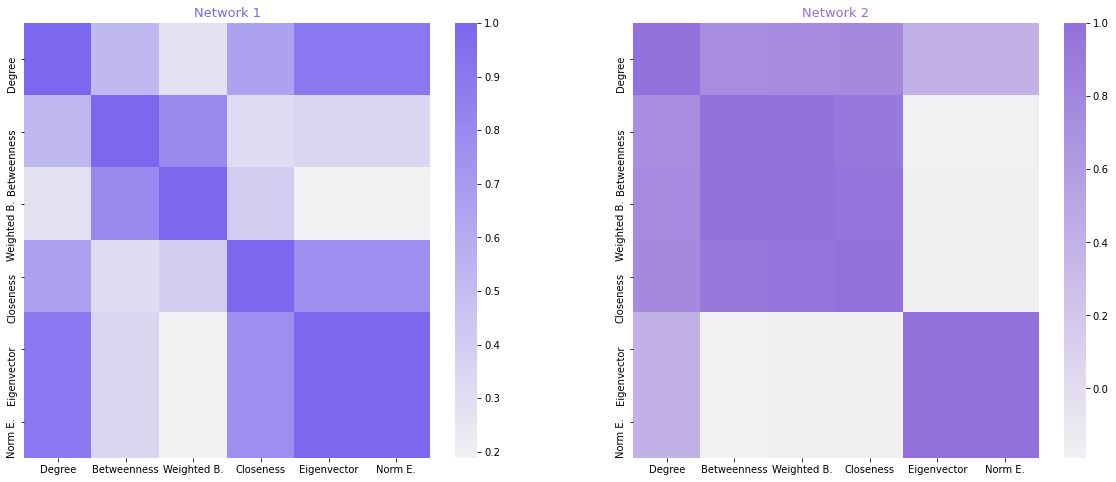

In [36]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharex=True)
sns.heatmap(data=correlation1, cmap=sns.light_palette("mediumslateblue", as_cmap=True), ax=ax3)
ax3.set_title("Network 1", fontsize=13, color="mediumslateblue")
sns.heatmap(data=correlation2, cmap=sns.light_palette("mediumpurple", as_cmap=True), ax=ax4)
ax4.set_title("Network 2", fontsize=13, color="mediumpurple")
plt.show()

**Both networks' centrality measures are correlated with one another. Network1's correlation scores are high between the pairs of "Degree" and "Eigenvector", however, "Betweenness" and "Closeness" as well as "Betweenness" and "Eigenvector" are pairs that have lower correlation scores. Network2's correlation scores are similar to ones expressed previusly about Network1 as Network2's correlation scores are high between "Betweenness" and "Closeness" and low between the pairs of "Eigenvector" and Betweenness" as well as "Eigenvector" and "Closeness".**

## <u>Task 3 - Network Thresholding:</u>

**Below two functions are created to produce thesholded network graphs, one for creating a thresholded network and another for visualising the graphs while utilising the first function.**

In [39]:
def thresholding(network, threshold):

    G = nx.Graph()

    for node in network.nodes():
        G.add_node(node)

    for edge in network.edges(data=True):
        if edge[2]["weight"] >= threshold:
            G.add_edge(edge[0], edge[1])
    
    G.remove_nodes_from(list(nx.isolates(G)))
    return G

In [61]:
def threshold_graph(network, number, t):
    t_graph = thresholding(network, t)
    
    if number == 1:
        color = "coral"
    elif number == 2:
        color = "orangered"
    title = "Thresholded Network " + str(number) + " (t=" + str(t) + ")"
    
    plt.figure(figsize=(20,7))
    nx.draw_networkx(t_graph, with_labels=True, node_size=700, node_color=color, font_size=13)
    plt.title(label=title, fontsize=20, color=color)
    plt.axis("off")
    plt.show()

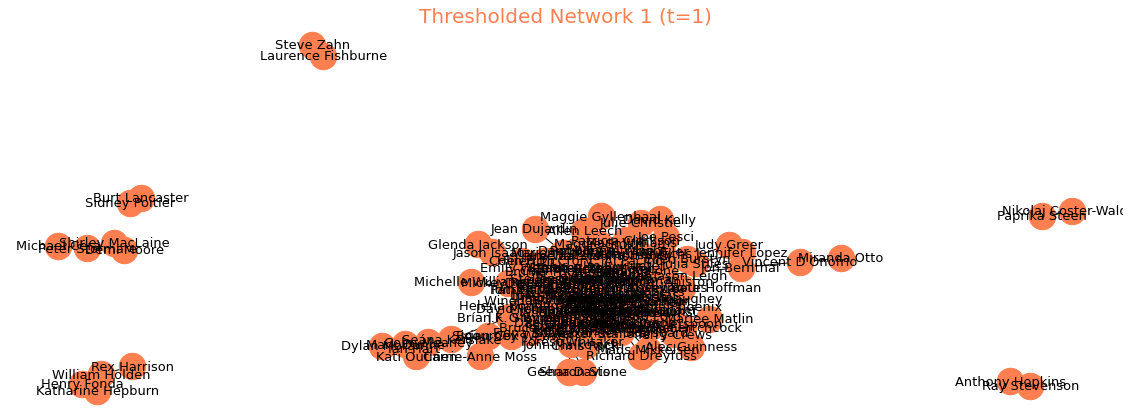

In [63]:
threshold_graph(network1, 1, 1)

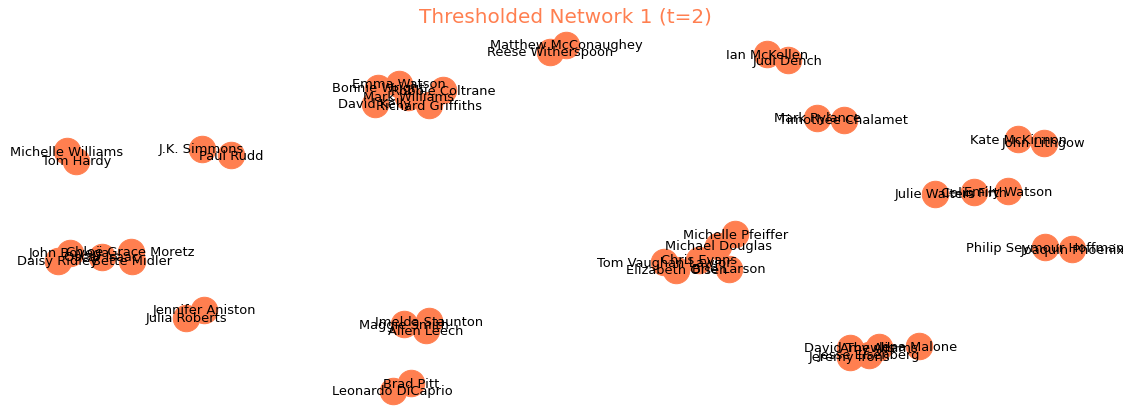

In [64]:
threshold_graph(network1, 1, 2)

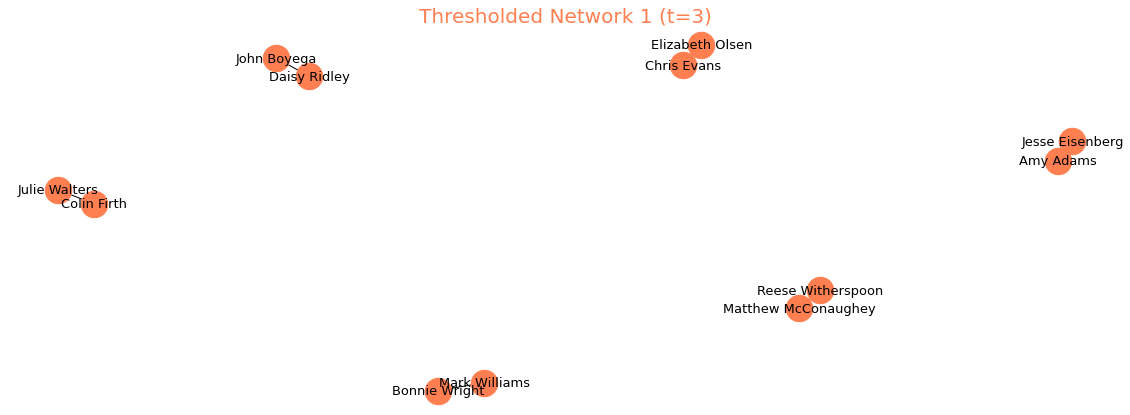

In [67]:
threshold_graph(network1, 1, 3)

**From the graphs above (Network1) and below (Network2), it can be observed that as the threshold t increases, the network graphs become less and less populated.**

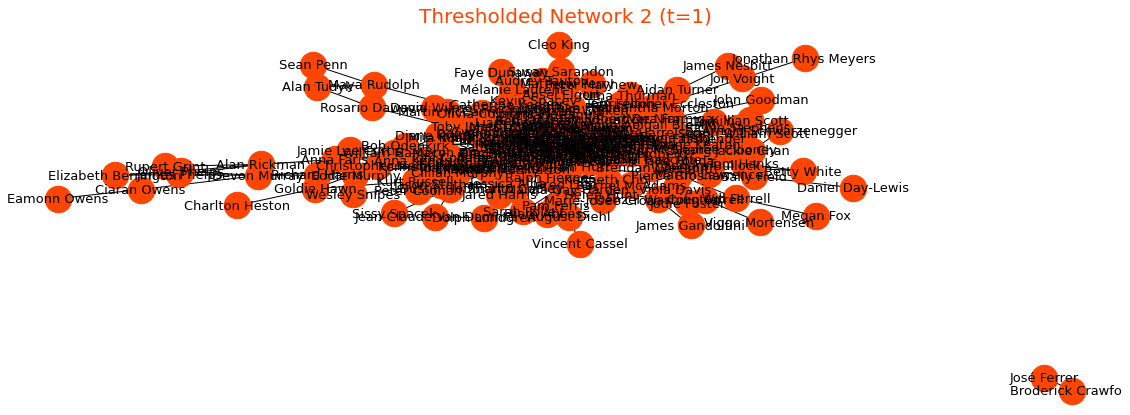

In [68]:
threshold_graph(network2, 2, 1)

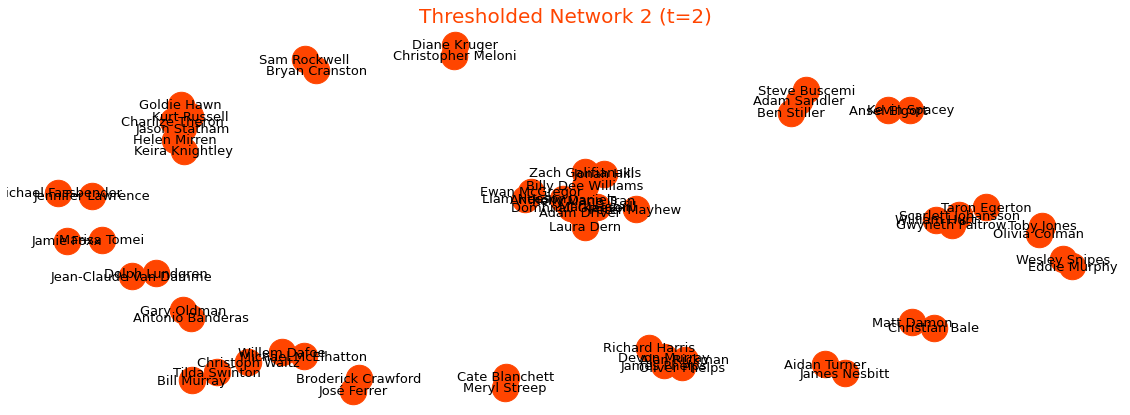

In [69]:
threshold_graph(network2, 2, 2)

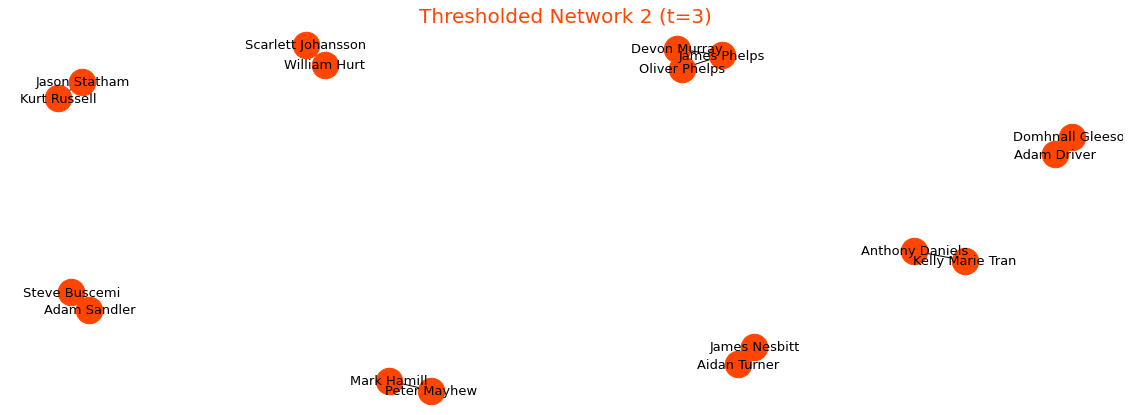

In [70]:
threshold_graph(network2, 2, 3)

## <u>Task 4 - Egocentric Analysis:</u>

In [ ]:
def egocentric(network, ego):
    
    ego_ = nx.ego_graph(network, ego)
    pos = nx.spring_layout(network, k=3) # k changes the distance between nodes
    
    plt.figure(figsize=(10,10))
    plt.margins(0.1, 0.1)
    title = "Ego Network for " + ego + " - connected to " + str(ego_.number_of_nodes()) + " nodes"
    plt.title(title, fontsize=15, color="deeppink")
    
    nx.draw_networkx(ego_, pos, with_labels=True, font_size=12, node_size=500, node_color="pink", edge_color="purple")
    nx.draw_networkx_nodes(ego_, pos, nodelist=[ego], node_size=2500, node_color="deeppink")
    
    plt.axis("off")
    plt.show()

In [ ]:
def ego_centrality(network, ego):
    ego_ = nx.ego_graph(network, ego)
    
    if nx.is_connected(ego_) == True:
        print("Ego: %s --> Connected to %d nodes, %d edges" % (ego, ego_.number_of_nodes(), ego_.number_of_edges()))
    else:
        print("Ego: %s --> not connected")
    
    print("Density:" + str(nx.density(ego_)))
    print("Diameter: " + str(nx.diameter(ego_)) + ", Average Shortest Path: " + str(nx.average_shortest_path_length(ego_)))

    print("Average Clustering Coefficient: " + str(nx.average_clustering(ego_)))
    print("Average Degree: " + str(pd.Series(dict(nx.degree(ego_))).mean()))

**In Task 2, "Adam Driver" was found to be an important node as it was the first in dataframes where nodes were compared according to their "Degree" and "Eigenvector" measures. This node's connections are depicted belw using ego centrality:**

In [ ]:
egocentric(network2, "Adam Driver")

In [ ]:
ego_centrality(network2, "Adam Driver")

**The nodes below was found to have the highest value of closeness and betweenness (respectively) in their network in Task 2. From ego-centric analysis, it can be observed that both nodes have similar densities as well as the same values of diameter (2) and average shortest path (~1.7). Furthermore, these nodes have similar number of connections with 13 and 12 nodes (20 and 19 edges) respectively.**

In [ ]:
egocentric(network1, "Timothée Chalamet")

In [ ]:
ego_centrality(network1, "Timothée Chalamet")

In [ ]:
egocentric(network1, "Emma Watson")

In [ ]:
ego_centrality(network1, "Emma Watson")

**From the below eigenvector dataframe which shows the most important nodes according to the importance of their connections, it can be seen that the concept of node "importance" is highly subjective. In the dataframe, we can observe "Timothée Chalamet" as the third most important node in the network. However, "Emma Watson" is not even in the top 10 most important nodes even though having similar scores to the previous node. In this case, "Emma Watson" has the highest betweenness centrality score which is extremely crucial for maintaining connectivity within networks, and removing the node would break the networks into multiple components. This further explains that there are many aspects to take into consideration when estimating importance in a network and the importance of certain nodes can change according to the expectations we have from the network.**

In [ ]:
centrality(network1, "Eigenvector")

## <u>Task 5 - Network Visualisation:</u>

**Network1 is visualised below using "Fruchterman Reingold":**

In [ ]:
nx.write_gexf(network1, "network1.gexf", prettyprint=True)

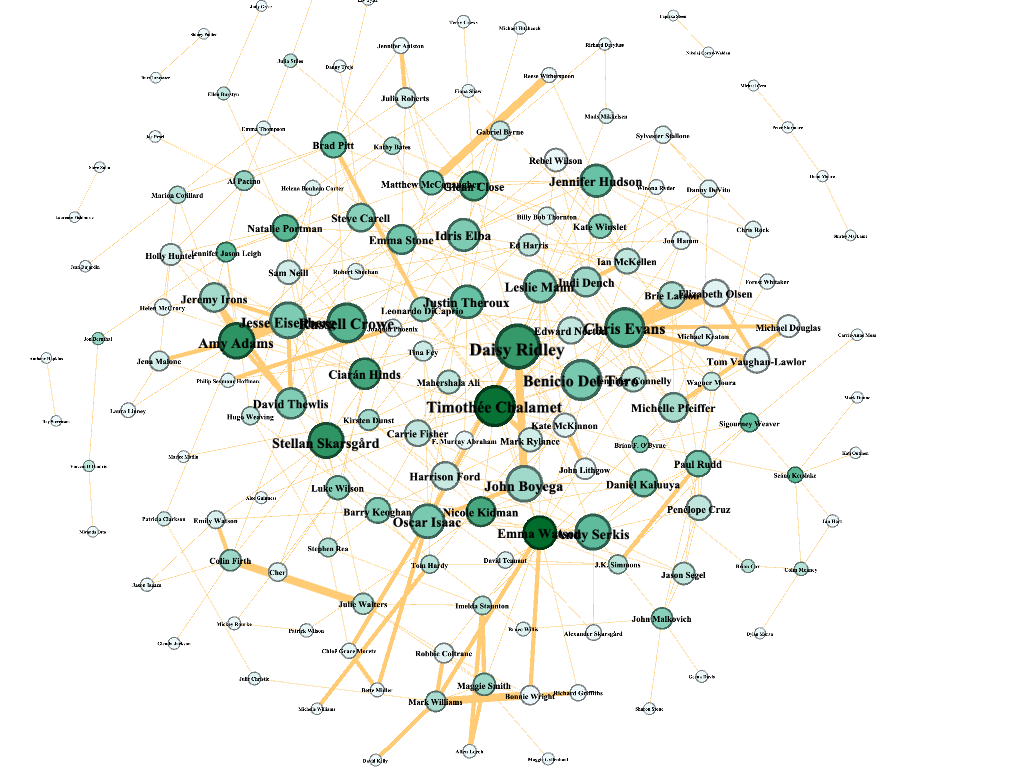

**Network2 is visualised below using "Noverlap":**

In [ ]:
nx.write_gexf(network2, "network2.gexf", prettyprint=True)

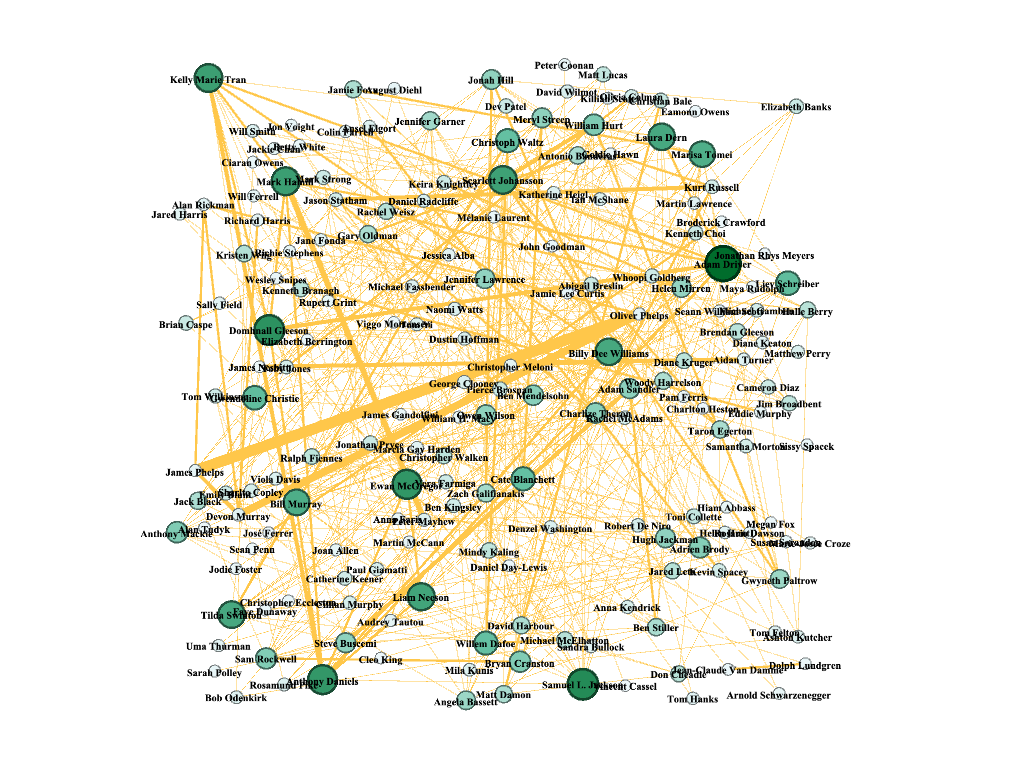